<h1 style='color: green; font-size: 36px; font-weight: bold;'>Modelo Preditivo de Regress√£o - Previs√£o do Pre√ßo de venda de Carros</h1>

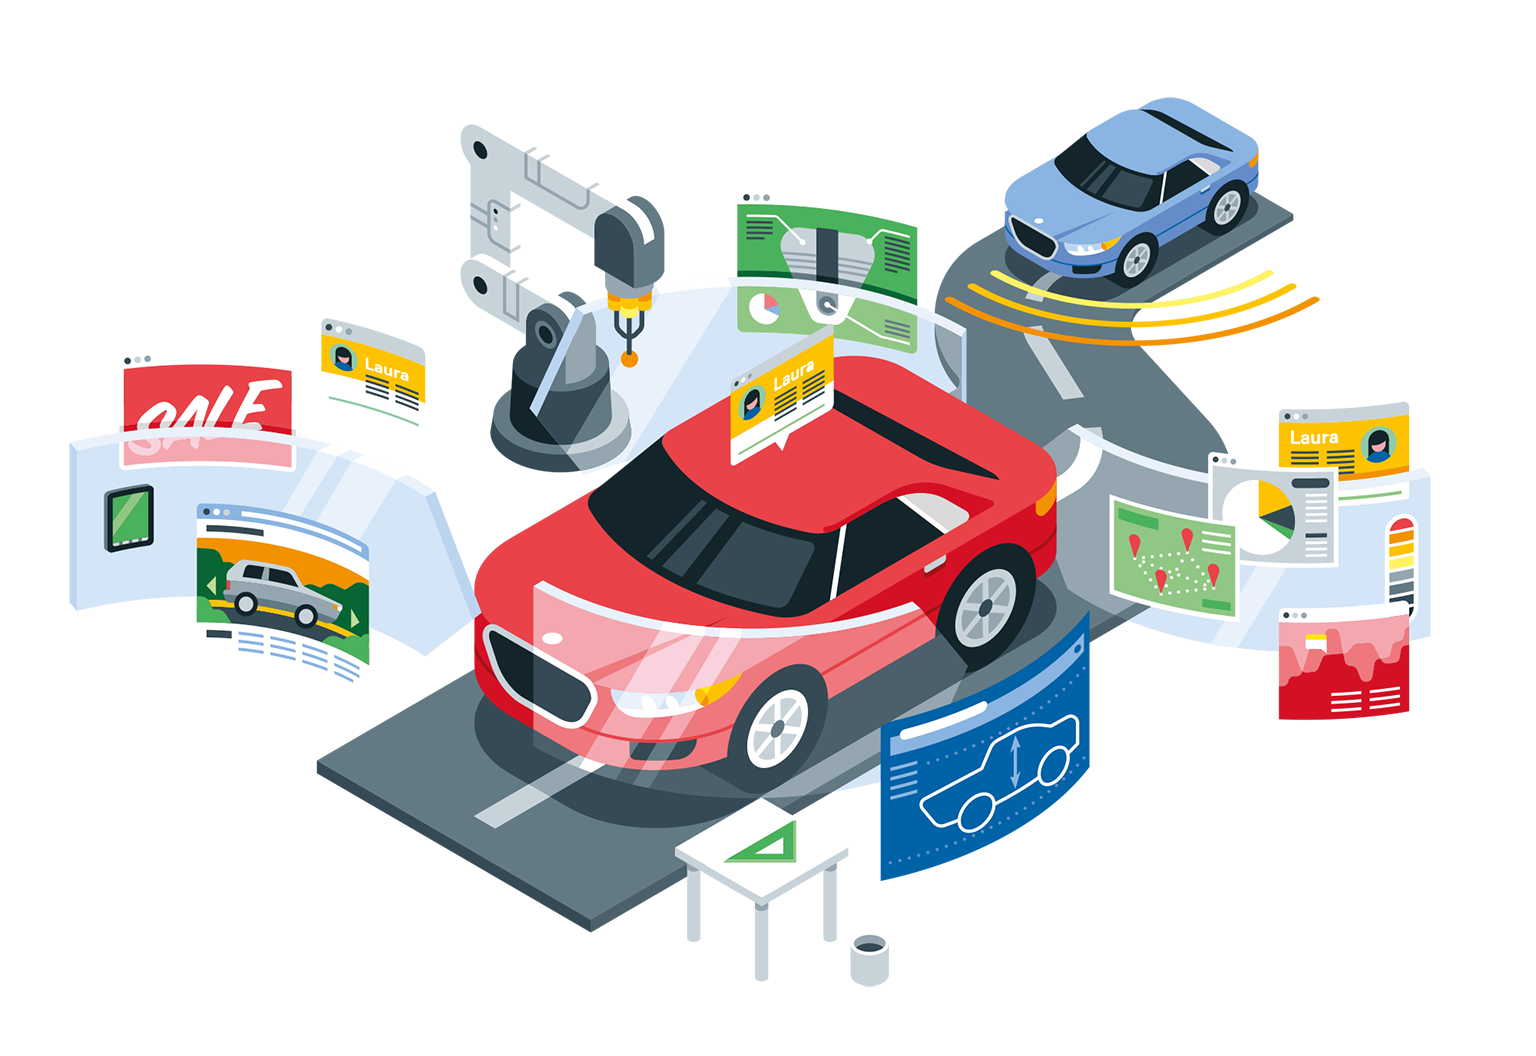

## Problema de Neg√≥cio:

üëâ Com demandas crescentes e competi√ß√µes acirradas no mercado, uma loja fict√≠cia do ramo de carros est√° buscando prever o pre√ßo dos carros para os pr√≥ximos anos e o aumento de vendas

üëâ Neste case irei abordar a constru√ß√£o de um modelo preditivo supervisionado com o intuito de prever o Aumento de Vendas e o pre√ßo dos carros dessa empresa fict√≠cia baseado em suas informa√ß√µes de produtos

üëâ Utilizarei os principais algoritmos de Machine Learning para a cria√ß√£o de modelos preditivos de regress√£o e testar a performance de cada um com intuito de apontar o mais preciso na previs√£o, buscando o aprimoramento de seus hiperpar√¢metros.

#### Sum√°rio:

- 1) Importando as principais Bibliotecas üíª
- 2) Leitura do dataset üìÇ
- 3) An√°lises preliminares e tratamento dos dados üìÉ
- 4) Extra√ß√£o de Insights üí°
- 5) Preparando o dataset para o modelo üîß
- 6) An√°lise de correla√ß√£o üìà
- 7) Cria√ß√£o e avalia√ß√£o dos modelos ü§ñ
- 8) Conclus√£o üéâ

## 1) Importando as principais Bibliotecas üíª

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import emojis
import handcalcs.render
warnings.filterwarnings("ignore")
%matplotlib inline

## 2) Leitura do dataset üìÇ

O dataset possui 301 linhas e 9 colunas, sendo que 1 delas est√° relacionada com o pre√ßo da Venda (Selling_Price) da empresa. O foco do estudo ser√° na previs√£o do pre√ßo do carro com base nos dados fornecidos pelas features.

O modelo dever√° ser respons√°vel por treinar estas informa√ß√µes e aprender uma boa maneira de prever o pre√ßo dos carros.

#### Features:

- Car_Name: Nome do modelo do carro
- Year: Ano de fabrica√ß√£o do carro
- Selling_Price: Pre√ßo de venda do carro
- Present_Price: Pre√ßo atual do carro
- Kms_Driven: Kilometragem atual do carro
- Fuel_Type: Tipo de combust√≠vel
- Seller_Type: Tipo de vendedor
- Owner: Quantidade de donos que o carro teve

In [415]:
# Setar a op√ß√£o de visualiza√ß√£o para todas as colunas
pd.set_option('display.max_columns', None)

In [416]:
df = pd.read_csv('C:/Users/lucas/Downloads/cardata.csv',sep=',', encoding='windows-1252')
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

## 3) An√°lises preliminares e tratamento dos dados üìÉ

Para que o modelo performe muito bem √© ideal que o dataset esteja limpo e puro, as vezes um dataset bem transformado j√° resolve qualquer problema de performance complexo que o modelo precisa passar para ser reajustado.

Para isso √© ideal retirar valores duplicados ou nulos que possam atrapalhar a performance de precis√£o do modelo (veficar antes se √© necess√°rio simplesmente deletar os valores. Alguns casos √© necess√°rio mant√™-los ou at√© mesmmo substituir por algum outro valor que sej√° √∫til. Por exemplo: se tivessemos valores nulos de renda e √© indispens√°vel a participa√ß√£o deste dado no modelo, ent√£o seria interessante preenche-lo com a mediana dos valores).

* #### Tamanho do dataset:

In [417]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 301 linhas e 9 colunas


* #### Dados Nulos:

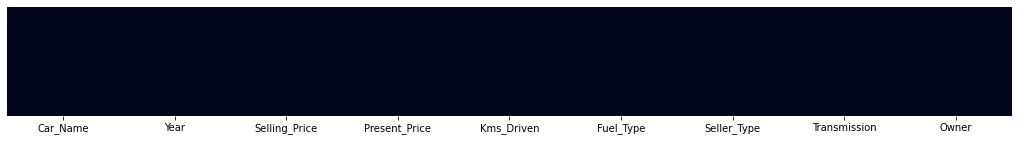

In [418]:
# Checando valores nulos
plt.figure(figsize=(18,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

In [419]:
nulos = df.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64 dados nulos


* #### Tipo de dados:

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* #### Dados duplicados:

In [421]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 2 dados duplicados


Quais linhas s√£o duplicadas?

In [422]:
df[df.duplicated()]

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
17      Dealer       Manual      0  
93      Dealer    Automatic      0

Analisando as linhas duplicadas:

In [423]:
df[(df['Car_Name'] == 'ertiga' ) & (df['Year'] == 2016)]

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15   ertiga  2016           7.75          10.79       43000    Diesel   
17   ertiga  2016           7.75          10.79       43000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0

In [424]:
df[(df['Car_Name'] == 'fortuner' ) & (df['Selling_Price'] == 23.00)]

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0

Vemos que realmente est√£o duplicadas e podem ser deletadas

In [425]:
df = df.drop_duplicates()
df.shape

(299, 9)

In [426]:
df.reset_index(drop=True, inplace=True)

üëâ Perfeito! Aparentemente o dataset est√° limpo e pronto para extra√ß√£o de alguns insights

* #### Criando a coluna de idade do carro

In [427]:
df['Car_Age'] = 2019 - df['Year']

In [428]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Car_Age  
0      Dealer       Manual      0        5  
1      Dealer       Manual      0        6  
2      Dealer       Manual      0        2  
3      Dealer       Manual      0        8  
4      Dealer       Manual      0        5

## 4) Extra√ß√£o de Insights üí°

Com os insights √© poss√≠vel obter informa√ß√µes importantes do pre√ßo dos carros a partir das outras features presentes no dataset

## 4.1) Anual üìÖ

* #### Quantidade de Vendas por Ano

In [94]:
df.head(2)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   

  Seller_Type Transmission  Owner  Car_Age  
0      Dealer       Manual      0        5  
1      Dealer       Manual      0        6

In [95]:
#Criando um dataframe apenas com as vendas e os pre√ßos
df_bar = df[['Year','Selling_Price']]

#Agrupando os valores por regi√£o e fazendo a soma dos valores
df_bar = df_bar.groupby('Year').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 16 artists>

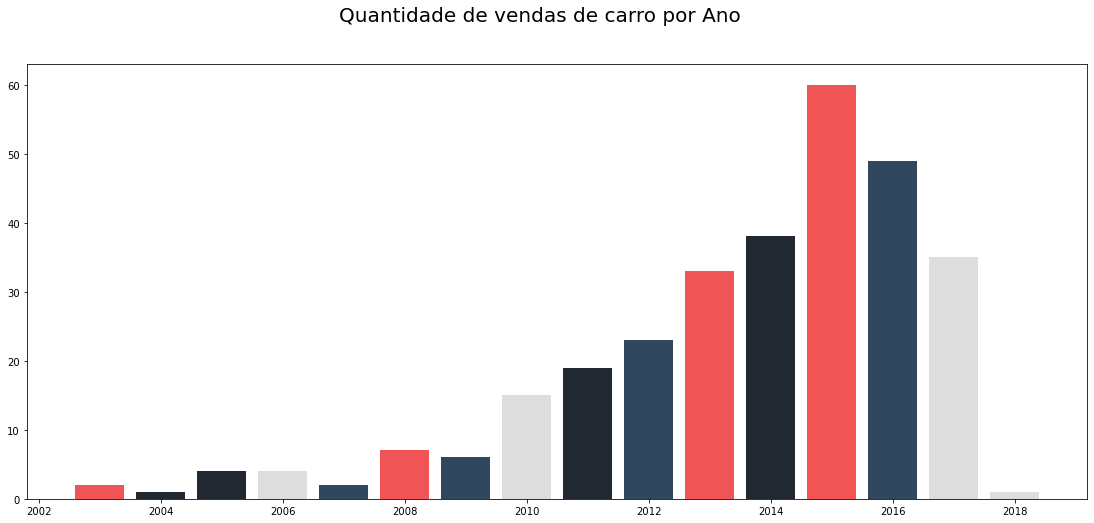

In [96]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Quantidade de vendas de carro por Ano", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

üëâ O ano com maior n√∫mero de vendas foi 2015. Tamb√©m √© poss√≠vel analisar que a longo prazo as vendas foram aumentando consideravelmente. 

üëâ Em 2016 e 2017 voltou a haver queda e 2018 como o ano n√£o foi fechado os dados n√£o podem ser utilizados para conclus√£o se a queda iria continuar ou n√£o

* #### TOP 10 Carros mais vendidos

In [56]:
#Criando um dataframe apenas com as vendas e os carros
df_bar = df[['Car_Name','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Car_Name').count().sort_values(by='Selling_Price', ascending=False)

In [57]:
df_bar = df_bar.head(10)

<BarContainer object of 10 artists>

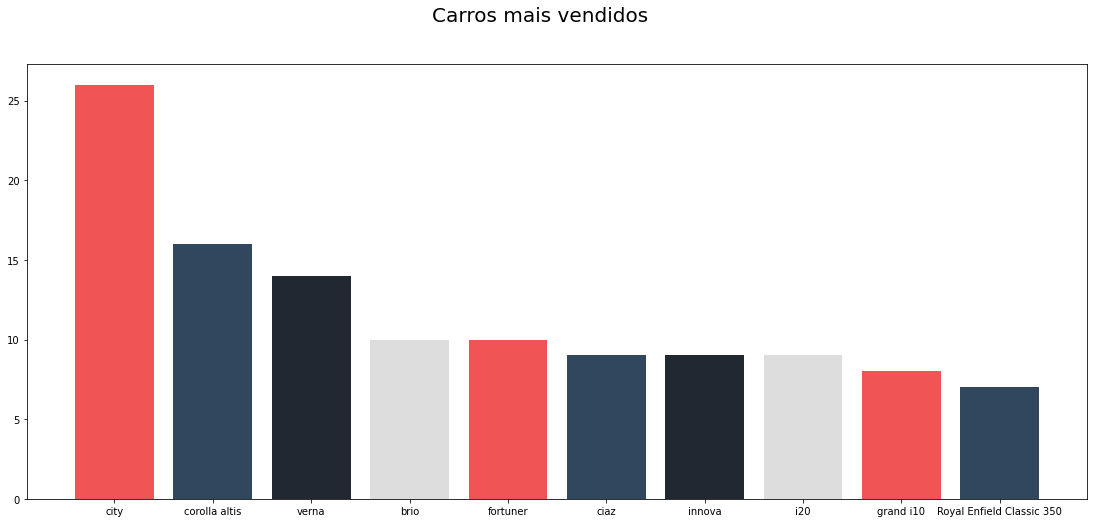

In [59]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Carros mais vendidos", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [66]:
df_bar.head(10)

Selling_Price
Car_Name                                
city                                  26
corolla altis                         16
verna                                 14
brio                                  10
fortuner                              10
ciaz                                   9
innova                                 9
i20                                    9
grand i10                              8
Royal Enfield Classic 350              7

üëâ No geral o carro mais vendido foi o city, seguido do corolla altis, verna, brio e assim por diante.

üëâ O city representa 22% das vendas totais dos TOP 10

üëâ 64% do total das vendas do TOP 10 pertence aos 5 primeiros carros

* #### TOP 10 Carros mais vendidos no ano de 2015

In [67]:
df_2015 = df.loc[df['Year']==2015]

In [68]:
#Criando um dataframe apenas com as vendas e os Carros
df_bar = df_2015[['Car_Name','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Car_Name').count().sort_values(by='Selling_Price', ascending=False)

In [69]:
df_bar = df_bar.head(10)

<BarContainer object of 10 artists>

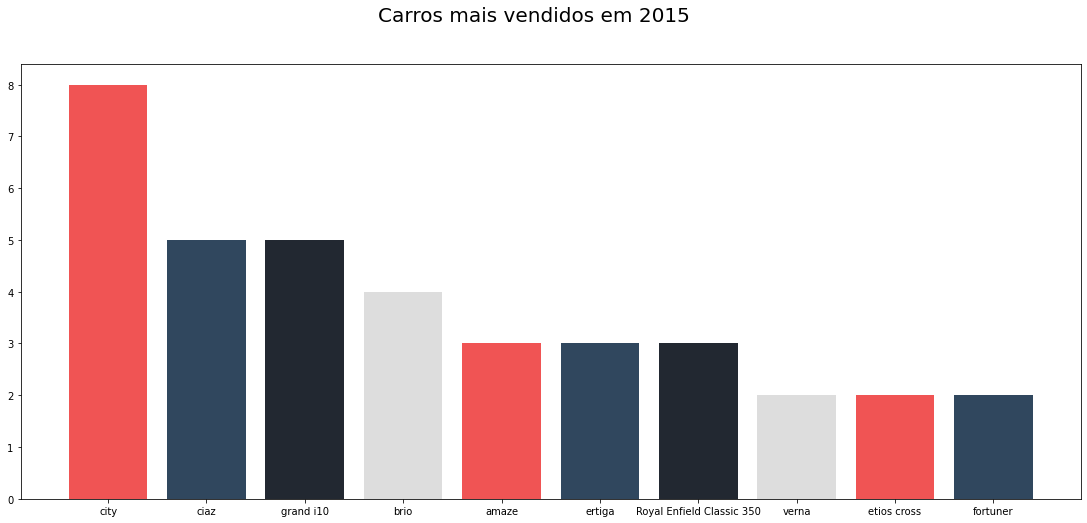

In [70]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Carros mais vendidos em 2015", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [72]:
df_bar.head(10)

Selling_Price
Car_Name                                
city                                   8
ciaz                                   5
grand i10                              5
brio                                   4
amaze                                  3
ertiga                                 3
Royal Enfield Classic 350              3
verna                                  2
etios cross                            2
fortuner                               2

üëâ No geral o carro mais vendido foi o city, seguido do ciaz, grand i10, brio e assim por diante.

üëâ O city representa 22% das vendas totais

üëâ 67% do total das vendas pertence aos top 5 carros

üëâ O ano de 2015 tem uma vis√£o similar ao geral dos outros anos

## 4.2) Categorica üöó

* #### Tipo de combust√≠vel

In [81]:
#Criando um dataframe de contagem dos combust√≠veis
df_bar = df[['Fuel_Type','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Fuel_Type').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 3 artists>

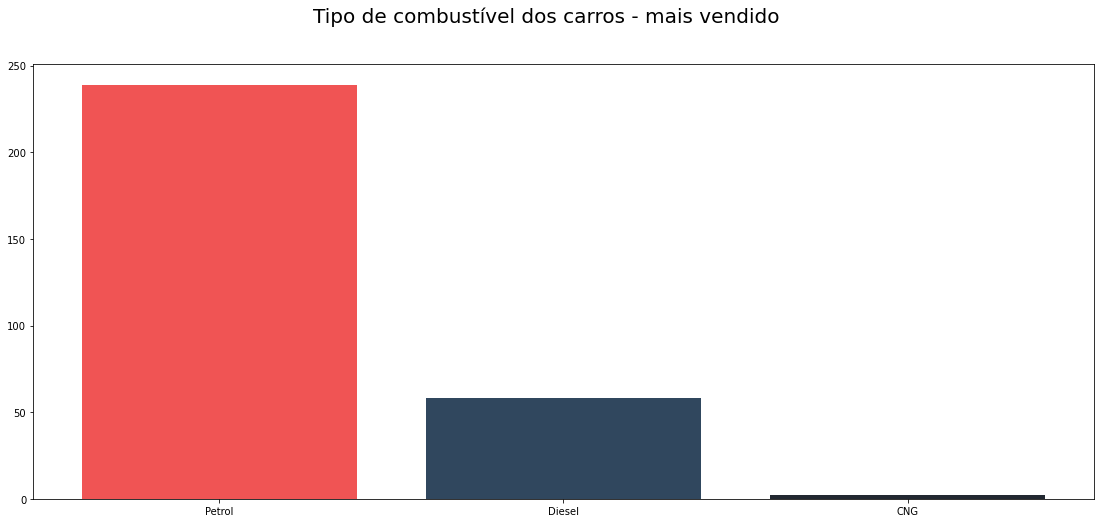

In [82]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Tipo de combust√≠vel dos carros - mais vendido", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [83]:
df_bar.head()

Selling_Price
Fuel_Type               
Petrol               239
Diesel                58
CNG                    2

üëâ Os carros mais vendidos s√£o aqueles com combust√≠vel derivados do petr√≥leo, no caso gasolina, em sua esmagadora maioria (80%)

üëâ Em seguida diesel (19.4%) e CNG (G√°s natural) (0.6%)

* #### Transmiss√£o do carro

In [78]:
#Criando um dataframe de contagem da transmiss√£o
df_bar = df[['Transmission','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Transmission').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 2 artists>

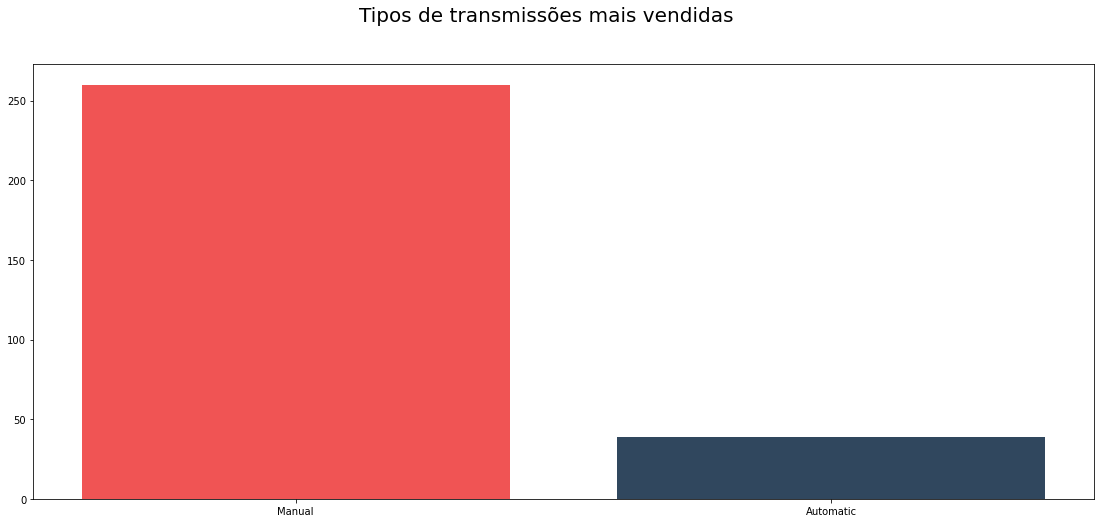

In [79]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Tipos de transmiss√µes mais vendidas", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [80]:
df_bar.head()

Selling_Price
Transmission               
Manual                  260
Automatic                39

üëâ Na esmagadora maioria os carros do tipo manual s√£o os mais vendidos (89%), seguidos dos autom√°ticos (11%)

* #### Tipos de Vendedores:

In [85]:
#Criando um dataframe de contagem dos vendedores
df_bar = df[['Seller_Type','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Seller_Type').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 2 artists>

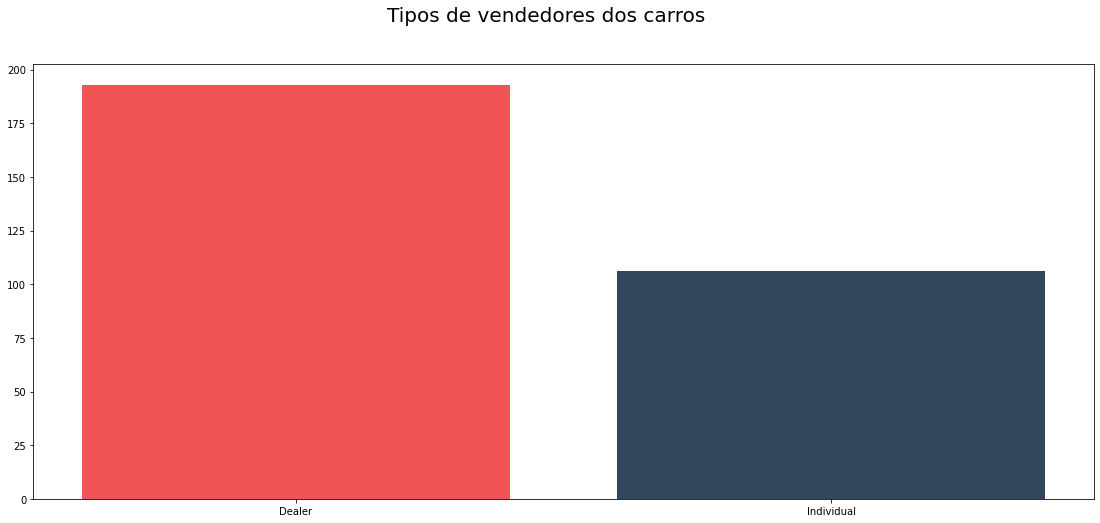

In [86]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Tipos de vendedores dos carros", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [87]:
df_bar.head()

Selling_Price
Seller_Type               
Dealer                 193
Individual             106

üëâ 64% das pessoas compram pelas distribuidoras e 36% com pessoas f√≠sicas

* #### N√∫mero de donos

In [88]:
#Criando um dataframe de contagem dos donos
df_bar = df[['Owner','Selling_Price']]

#Agrupando os valores por marca e fazendo a contagem dos valores
df_bar = df_bar.groupby('Owner').count().sort_values(by='Selling_Price', ascending=False)

<BarContainer object of 3 artists>

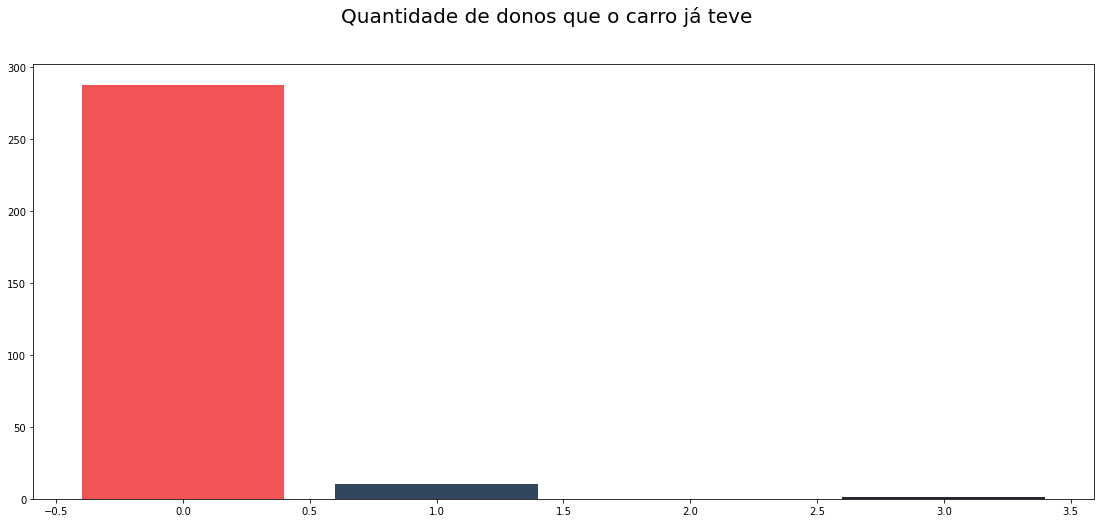

In [89]:
#Criando a figura para visualiza√ß√£o
plt.figure(figsize=[19,8])

#T√≠tulo
plt.suptitle("Quantidade de donos que o carro j√° teve", size=20)

#Plotando o gr√°fico de barras
plt.bar(x = df_bar.index, height='Selling_Price', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

In [90]:
df_bar.head()

Selling_Price
Owner               
0                288
1                 10
3                  1

üëâ 96% das pessoas compraram carros 0km ou novos, sem nenhum dono pr√©vio

üëâ os 4% compraram carros com pelo menos mais de 1 dono

## 5) Preparando o dataset para o modelo üîß

* #### Deletando a coluna Ano

In [429]:
df.drop(['Year'], axis=1 , inplace=True)

* #### Alterando a ordem das colunas

In [430]:
# To change columns orders
df = df.reindex(columns=['Car_Name','Kms_Driven', 'Fuel_Type','Seller_Type','Transmission', 'Owner', 'Car_Age',
                         'Present_Price', 'Selling_Price'])

df

Car_Name  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  Car_Age  \
0       ritz       27000    Petrol      Dealer       Manual      0        5   
1        sx4       43000    Diesel      Dealer       Manual      0        6   
2       ciaz        6900    Petrol      Dealer       Manual      0        2   
3    wagon r        5200    Petrol      Dealer       Manual      0        8   
4      swift       42450    Diesel      Dealer       Manual      0        5   
..       ...         ...       ...         ...          ...    ...      ...   
294     city       33988    Diesel      Dealer       Manual      0        3   
295     brio       60000    Petrol      Dealer       Manual      0        4   
296     city       87934    Petrol      Dealer       Manual      0       10   
297     city        9000    Diesel      Dealer       Manual      0        2   
298     brio        5464    Petrol      Dealer       Manual      0        3   

     Present_Price  Selling_Price  
0             5.59           3.35  
1             9.54           4.75  
2             9.85           7.25  
3             4.15           2.85  
4             6.87           4.60  
..             ...            ...  
294          11.60           9.50  
295           5.90           4.00  
296          11.00           3.35  
297          12.50          11.50  
298           5.90           5.30  

[299 rows x 9 columns]

* #### Alterando as vari√°veis categ√≥ricas para n√∫mericas

Feature Engineering simples

In [431]:
#converting the categorical to numeric
df["Fuel_Type"] = df["Fuel_Type"].map({"Petrol": 1, "Diesel": 2, "CNG": 3})
df["Seller_Type"] = df["Seller_Type"].map({"Dealer": 1, "Individual": 2})
df["Transmission"] = df["Transmission"].map({"Manual": 1, "Automatic": 2})
df.head()

Car_Name  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  Car_Age  \
0     ritz       27000          1            1             1      0        5   
1      sx4       43000          2            1             1      0        6   
2     ciaz        6900          1            1             1      0        2   
3  wagon r        5200          1            1             1      0        8   
4    swift       42450          2            1             1      0        5   

   Present_Price  Selling_Price  
0           5.59           3.35  
1           9.54           4.75  
2           9.85           7.25  
3           4.15           2.85  
4           6.87           4.60

* #### Deletando o nome do carro

In [432]:
df.drop(['Car_Name'], axis=1 , inplace=True)
df.head()

Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  Car_Age  \
0       27000          1            1             1      0        5   
1       43000          2            1             1      0        6   
2        6900          1            1             1      0        2   
3        5200          1            1             1      0        8   
4       42450          2            1             1      0        5   

   Present_Price  Selling_Price  
0           5.59           3.35  
1           9.54           4.75  
2           9.85           7.25  
3           4.15           2.85  
4           6.87           4.60

In [327]:
df.to_csv('C:/Users/lucas/Downloads/cardata_ML.csv')

## 6) An√°lise de correla√ß√£o üìà

<AxesSubplot:>

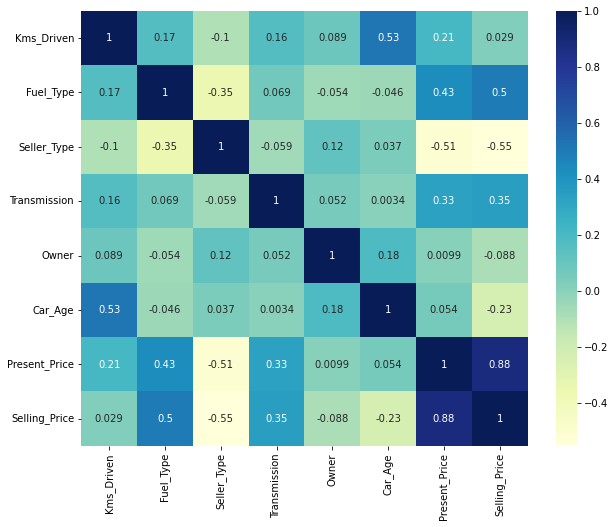

In [17]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

üëâ A maior correla√ß√£o est√° entre as vari√°veis Present_Price e Selling_Price (0.88), uma vez que ambas tratam de pre√ßo

üëâ H√° correla√ß√µes significativas como Car_Age e KMS_Driven, por√©m o restante est√° muito baixo

üëâ Para a constru√ß√£o de um modelo de regress√£o linear, ser√° do tipo m√∫ltiplo uma vez que h√° mais de uma feature que influencia o valor da vari√°vel target

## 7) Cria√ß√£o e avalia√ß√£o dos modelos ü§ñ

## 7.1) Separando os dados 

In [433]:
X = pd.DataFrame(df, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

y = df['Selling_Price'].values.reshape(-1, 1)

Separando em 80% treino e 20% teste

In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [435]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("df:", df.shape)

X_train: (239, 7)
X_test: (60, 7)
y_train: (239, 1)
y_test: (60, 1)
df: (299, 8)


## 7.2) Modelo Lazy

üëâ O objetivo do estudo √© prever o pre√ßo de venda dos carros, por√©m h√° diversos algoritmos supervisionados de machine learning para se utilizar na previs√£o dos dados. 

üëâ A biblioteca LazyRegressor do python pode ser √∫til na escolha do modelo. Esta biblioteca oferece uma abordagem simplificada para a cria√ß√£o de modelos de machine learning. Ao inv√©s de selecionar manualmente um modelo e ajustar seus par√¢metros, o LazyRegressor treina v√°rios modelos de regress√£o com seus hiperpar√¢metros padr√£o e seleciona automaticamente o modelo que obteve o melhor desempenho para o conjunto de dados fornecido. 

üëâ Com isso j√° √© poss√≠vel ter uma no√ß√£o inicial de qual modelo pode performar melhor com os hiperpar√¢metros padr√µes, ficando f√°cil de escolher os melhores e depois ajustar cada um dos par√¢metros para obter uma pontua√ß√£o ainda melhor e mais espec√≠fica.

In [144]:
from lazypredict.Supervised import LazyRegressor

In [145]:
# criar modelo LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# ver os resultados
print(models)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41/41 [00:01<00:00, 28.66it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.97       0.97  0.70        0.04
RandomForestRegressor                        0.95       0.96  0.83        0.16
XGBRegressor                                 0.95       0.96  0.87        0.05
DecisionTreeRegressor                        0.93       0.94  1.02        0.02
AdaBoostRegressor                            0.93       0.94  1.03        0.08
BaggingRegressor                             0.92       0.93  1.09        0.05
KNeighborsRegressor                          0.90       0.92  1.22        0.02
MLPRegressor                                 0.88       0.89  1.37        0.19
ExtraTreesRegressor                          0.84       0.86  1.57        0.11
HistGradientBoostingRegressor                0.83       0.85  1.60        0.17
LGBMRegressor                                0.83   

üëâ Ent√£o apenas com os hiperpar√¢metros padr√µes j√° √© poss√≠vel observar que o GradientBoosting possui uma reta ajustada quase que perfeita (R¬≤ = 0.97), por√©m n√£o podemos adotar essas informa√ß√µes como verdades absolutas. Primeiro que os hiperpar√¢metros est√£o setados no default, segundo que o modelo pode ter obtido um R¬≤ alto por conta de overfitting. Por isso h√° necessidade de investigar alguns desses algoritmos e testar com os dados de teste

üëâ Por√©m o LazyRegressor n√£o deixou de ser √∫til para obter um "Norte" de qual caminho deve-se seguir.

üëâ Para trabalhar com cada algoritmo que realiza c√°lculos de forma diferentes, irei abordar os modelos de: GradientBoostingRegressor, RandomForestRegressor, KNeighborsRegressor, LinearRegression (Normal, Lasso e Ridge).

## 7.3) Regress√£o Linear - Statsmodel

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Adicionando constantes a vari√°vel X
Xc = sm.add_constant(X)

#Criando o modelo de Regress√£o Linear OLS com o statsmodel usando y e Xc
modelo = sm.OLS(y, Xc)

#Treinando o modelo
modelo_v1 = modelo.fit()

In [35]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     293.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          6.93e-128
Time:                        10:32:09   Log-Likelihood:                -591.94
No. Observations:                 299   AIC:                             1200.
Df Residuals:                     291   BIC:                             1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9497      0.666      2.927      0.004       0.639       3.261
Kms_Driven     -6.07e-06   3.24e-06     -1.871      0.062   -1.25e-05    3.16e-07
Fuel_Type         1.4567      0.279      5.226      0.000       0.908       2.005
Seller_Type      -1.1326      0.258     -4.386      0.000      -1.641      -0.624
Transmission      1.3349      0.332      4.025      0.000       0.682       1.988
Owner            -0.6639      0.425     -1.561      0.120      -1.501       0.173
Car_Age          -0.4038      0.043     -9.371      0.000      -0.489      -0.319
Present_Price     0.4420      0.016     27.800      0.000       0.411       0.473
==============================================================================
Omnibus:                       99.141   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.812
Skew:                           1.106   Prob(JB):                    2.85e-175
Kurtosis:                      10.722   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pelo statsmodel temos os seguintes par√¢metros:

üëâ R¬≤ = 0.876 (Muito Alto!)

üëâ Pelo p-valor, temos que as features: Kms_Driven, Owner n√£o explicam bem o modelo (ambas com p-valor >=0.05)

## 7.4) Regress√£o Linear - SKLearn

* #### Treinando o modelo

In [146]:
from sklearn.linear_model import LinearRegression

#Criando o modelo
modelo_v2 = LinearRegression()
#Treinando
modelo_v2.fit(X_train, y_train)

LinearRegression()

* #### Coeficientes

In [147]:
#Coeficiente linear (intercepto):
print(modelo_v2.intercept_)

#Coeficiente Angular:
print(modelo_v2.coef_)

[2.08971731]
[[-1.93652561e-05  1.60933360e+00 -1.40046729e+00  1.36562710e+00
  -9.22582616e-01 -3.10446939e-01  4.45006376e-01]]


Equa√ß√£o linear do modelo:

#### y = -1.93652561e-05*x1 + 1.60933360e+00*x2 -1.40046729e+00*x3  + 1.36562710e+00*x4 -9.22582616e-01*x5 -3.10446939e-01*x6 + 4.45006376e-01*x6 + 2.08971731

* #### Previs√£o

In [148]:
y_pred = modelo_v2.predict(X_test)

* #### M√©tricas

In [149]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1.3135565633815836
Mean Squared Error:  4.422233984693793
Root Mean Squared Error:  2.1029108361254387
R2 Score:  0.7471833417702042


üëâ O valor de R¬≤ foi de 0.7471, aproximando para 0.75, sendo assim o mesmo valor que o LazyRegressor previu, uma vez que o modelo de regress√£o linear constru√≠do foi utilizando os hiperpar√¢metros setados no default. 

üëâ √â poss√≠vel aperfei√ßoar este modelo de Regress√£o Linear

* #### Previs√£o x Real

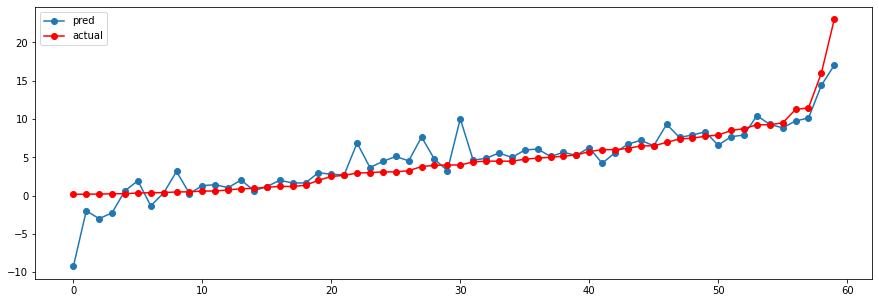

In [150]:
#Criando um dataframe com os valores previstos e os de testes
preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})

#Ordenando os valores do y teste dos menores aos maiores
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

#Tamanho da figura
plt.figure(figsize=(15, 5))

#Plot do y previsto
plt.plot(preds['y_pred'], label='pred', marker='o')
#Plot do y teste
plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
#Legendas
plt.legend()
plt.show()

üëâ Pelo gr√°fico fica mais claro a diferen√ßa entre os pontos previstos e os de teste. A ideia √© diminuir o erro residual entre cada um dos pontos de forma que fiquem bem pr√≥ximos

* #### Fun√ß√£o Automatizada

Como irei testar diversos par√¢metros para o modelo de Regress√£o Linear, vou automatizar uma fun√ß√£o que j√° calcula o novo modelo e devolve as m√©tricas e o gr√°fico de pontos

In [227]:
def modelo_regressor(df_novo,regressor):
    
    
#1) Criando os dados X e y

    X = pd.DataFrame(df_novo, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

    y = df_novo['Selling_Price'].values.reshape(-1, 1)
    
#2) Separando em treino e teste

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
#3) Imprimindo o shape

    print('========================================== Tamanho dos dados ===========================================')
    print("x_train", X_train.shape)
    print("x_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)
    

#4) Treinando o modelo
    regressor.fit(X_train, y_train)
    
#5) Imprimindo coeficientes
    print('====================================== Coeficientes =======================================================')
    
    print('Coeficiente Linear:', regressor.intercept_)
    #Slope:
    print('Coeficientes Angulares:',regressor.coef_)
    
# 6) Prevendo os dados

    y_pred = regressor.predict(X_test)
    
# 7) M√©tricas

    print('======================================= M√©tricas =========================================================')
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
    print('R¬≤ Score: ', r2_score(y_test, y_pred))
    
# 8) Plot 

    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

### 7.4.1) Regress√£o Ridge

üëâ O objetivo da regress√£o Ridge e da Lasso √© lidar com o problema de overfitting (sobreajuste) em modelos de regress√£o linear. O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas n√£o consegue generalizar bem para novos dados de teste.

üëâ Ambas ir√£o adicionar uma penaliza√ß√£o para cada uma das features do modelo. Na Ridge, a penaliza√ß√£o √© proporcional ao quadrado da magnitude dos coeficientes, enquanto na Lasso, a penaliza√ß√£o √© proporcional √† magnitude absoluta dos coeficientes

* #### Fun√ß√£o que calcula o RMSE

In [166]:
# Fun√ß√£o para calcular o RMSE
def rmse_cv(modelo):
    rmse = np.sqrt(-cross_val_score(modelo, 
                                    X_train, 
                                    y_train, 
                                    scoring = "neg_mean_squared_error", 
                                    cv = 5))
    return(rmse)

* #### Importando a fun√ß√£o Ridge

In [153]:
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
modelo_ridge = Ridge()

* #### Testando valores de alpha para o modelo Ridge

In [154]:
# Valores de alpha para testar com o modelo Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

Text(0, 0.5, 'RMSE')

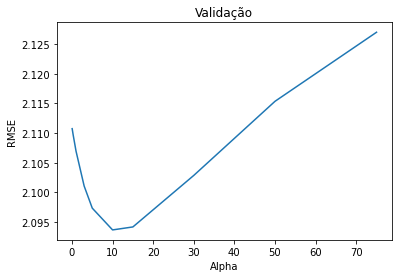

In [155]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Valida√ß√£o")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

üëâ Alpha = 10 possui o menor erro RMSE, performando assim melhor

* #### Comparando o R¬≤ do modelo de regress√£o linear normal x Regress√£o Ridge

In [157]:
modelo_ridge_max = Ridge(alpha = 10)

In [158]:
modelo_ridge_max.fit(X_train, y_train)

Ridge(alpha=10)

In [159]:
from sklearn.metrics import r2_score

# Avalia o desempenho do modelo de regress√£o linear no conjunto de teste
y_pred_lr = modelo_v2.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print('R2 do modelo de regress√£o linear:', r2_lr)

# Avalia o desempenho do modelo de regress√£o Ridge no conjunto de teste
y_pred_ridge = modelo_ridge_max.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('R2 do modelo de regress√£o Ridge:', r2_lasso)

R2 do modelo de regress√£o linear: 0.7471833417702042
R2 do modelo de regress√£o Ridge: 0.7623022232875761


* #### Testando o modelo de Regress√£o Ridge

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
====================================== Coeficientes =======================================================
Coeficiente Linear: [2.64180622]
Coeficientes Angulares: [[-1.74863213e-05  1.23446265e+00 -1.14026466e+00  8.47244043e-01
  -5.98062779e-01 -3.31149606e-01  4.64423282e-01]]
======================================= M√©tricas =========================================================
Mean Absolute Error:  1.250787499225773
Mean Squared Error:  4.1577766023170755
Root Mean Squared Error:  2.0390626773880873
R¬≤ Score:  0.7623022232875761
============================================= y_test x y_pred ============================================


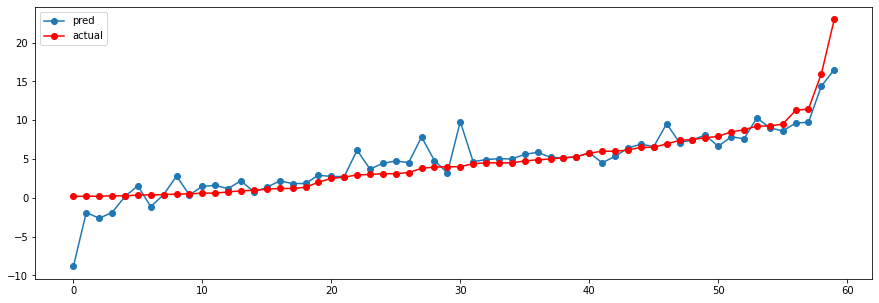

In [228]:
modelo_regressor(df,modelo_ridge_max)

üëâ A regress√£o Ridge (com alpha = 10) j√° apresentou um R¬≤ maior que o modelo de regress√£o linear simples e ainda se livrou dos problemas de overfitting 

## 7.4.2) Regress√£o Lasso

* #### Importando a fun√ß√£o Lasso

In [170]:
from sklearn.linear_model import Lasso

* #### Criando o modelo Lasso

In [171]:
modelo_lasso = Lasso()

In [175]:
modelo_lasso.fit(X_train,y_train)

Lasso()

* #### Testando valores de alpha para o modelo Lasso

Text(0, 0.5, 'RMSE')

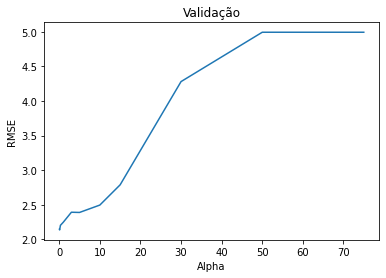

In [177]:
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Valida√ß√£o")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

* #### Comparando o R¬≤ da regress√£o Linear com a Lasso

In [189]:
modelo_lasso_max = Lasso(alpha=0)

In [192]:
modelo_lasso_max.fit(X_train,y_train)

Lasso(alpha=0)

In [194]:
# Avalia o desempenho do modelo de regress√£o linear no conjunto de teste
y_pred_lr = modelo_v2.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print('R2 do modelo de regress√£o linear:', r2_lr)

# Avalia o desempenho do modelo de regress√£o LASSO no conjunto de teste
y_pred_lasso = modelo_lasso_max.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('R2 do modelo de regress√£o LASSO:', r2_lasso)

R2 do modelo de regress√£o linear: 0.7471833417702042
R2 do modelo de regress√£o LASSO: 0.7471833417701942


üëâ No caso a Regress√£o Lasso teve um R¬≤ id√™ntico √† regress√£o normal! Ent√£o ser√° descartado

üëâ Seguiremos com o melhor modelo de Regress√£o Linear: Modelo Ridge com alpha = 10.

## 7.4.3) Aperfei√ßoando a Regress√£o Ridge com CV

üëâ O cross_val_score √© uma fun√ß√£o do scikit-learn que realiza valida√ß√£o cruzada e retorna o erro m√©dio do modelo em cada itera√ß√£o da valida√ß√£o cruzada.

üëâ A t√©cnica de CV Score consiste em dividir o conjunto de dados em partes chamadas folds, e em seguida treinar o modelo em cada fold e avali√°-lo em um fold diferente. Isso √© repetido v√°rias vezes at√© que todos os folds tenham sido usados para treinamento e avalia√ß√£o.

* #### Importando o Cross_val_Score e o KFold

In [196]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* #### Avaliando o Cross Validation

In [197]:
print('<============ Cross validation ================>')

# Folds para divis√£o do dataset
KF = 10
kfold_validation = KFold(KF)

# Encontrando o Erro m√©dio quadrado do modelo Ridge
results = cross_val_score (modelo_ridge_max, X , y , cv = kfold_validation)
print(results)
print(np.mean(results))

<============ Cross validation ================>
[ 7.58919197e-01  8.82128721e-01  7.24352705e-01  8.22867440e-01
 -6.03775975e+01 -7.40667217e+02  2.66356192e-01  7.84211996e-01
  8.42888139e-01  8.67000982e-01]
-79.5096089488914


üëâ Os piores resultados est√£o nos folds 5 e 6

In [203]:
#Folds totais
KF = 10

# F = folds para deletar
F = 5, 6
A = round (len(df)/KF)

# Deletando os folds 5 e 6 (√≠ndice de 120 √† 180 ser√° deletado, cada fold = 30 linhas)
df_fold_new = df[~((df.index > 120) & (df.index <= 180))]
df_fold_new.reset_index(drop=True, inplace=True)
df_fold_new

Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  Car_Age  \
0         27000          1            1             1      0        5   
1         43000          2            1             1      0        6   
2          6900          1            1             1      0        2   
3          5200          1            1             1      0        8   
4         42450          2            1             1      0        5   
..          ...        ...          ...           ...    ...      ...   
234       33988          2            1             1      0        3   
235       60000          1            1             1      0        4   
236       87934          1            1             1      0       10   
237        9000          2            1             1      0        2   
238        5464          1            1             1      0        3   

     Present_Price  Selling_Price  
0             5.59           3.35  
1             9.54           4.75  
2             9.85           7.25  
3             4.15           2.85  
4             6.87           4.60  
..             ...            ...  
234          11.60           9.50  
235           5.90           4.00  
236          11.00           3.35  
237          12.50          11.50  
238           5.90           5.30  

[239 rows x 8 columns]

In [206]:
df_fold_new.head()

Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  Car_Age  \
0       27000          1            1             1      0        5   
1       43000          2            1             1      0        6   
2        6900          1            1             1      0        2   
3        5200          1            1             1      0        8   
4       42450          2            1             1      0        5   

   Present_Price  Selling_Price  
0           5.59           3.35  
1           9.54           4.75  
2           9.85           7.25  
3           4.15           2.85  
4           6.87           4.60

* #### Testando a fun√ß√£o com o novo dataset

Utilizando o dataset sem os folds 5 e 6 no modelo de Regress√£o Ridge

========================================== Tamanho dos dados ===========================================
x_train (191, 7)
x_test (48, 7)
y_train (191, 1)
y_test (48, 1)
====================================== Coeficientes =======================================================
Coeficiente Linear: [2.3206261]
Coeficientes Angulares: [[-4.48829671e-06  1.01775739e+00 -3.40341565e-01  1.14896784e+00
  -6.66701884e-01 -4.81253881e-01  4.29263500e-01]]
======================================= M√©tricas =========================================================
Mean Absolute Error:  1.3413185528266849
Mean Squared Error:  4.979133026637222
Root Mean Squared Error:  2.231397101960389
R¬≤ Score:  0.8175198386580038
============================================= y_test x y_pred ============================================


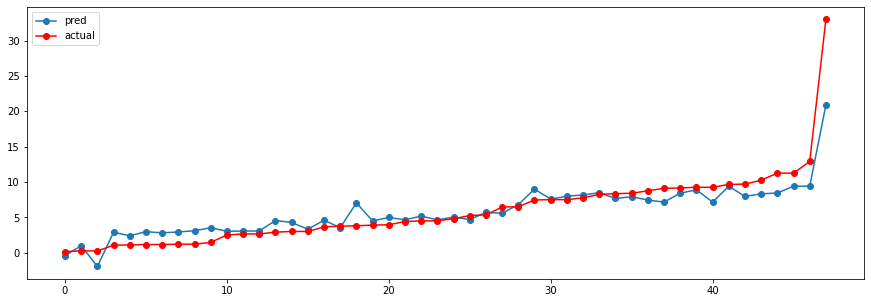

In [229]:
modelo_regressor(df_fold_new,modelo_ridge_max)

In [332]:
df_fold_new.to_csv('C:/Users/lucas/Downloads/cardata_KFold.csv')

üëâ O modelo de Regress√£o Ridge (alpha = 10) passado pelo CV Score (retirado o folder 5 e 6) apresentou um R¬≤ de 0.81, possuindo a melhor pontua√ß√£o at√© o momento.

## 7.5) Modelo KNNRegressor

üëâ O KNN Regressor determina o valor de um ponto de dados de teste calculando a m√©dia dos valores dos K pontos mais pr√≥ximos (vizinhos) do conjunto de treinamento. A dist√¢ncia entre os pontos de dados √© medida utilizando uma m√©trica de dist√¢ncia.

üëâ O n√∫mero de vizinhos K √© um hiperpar√¢metro que deve ser definido pelo usu√°rio. Quando K √© pequeno, o modelo pode sofrer de overfitting, enquanto que quando K √© grande, o modelo pode sofrer de underfitting.

üëâ O algoritmo KNN Regressor encontra os K pontos de dados mais pr√≥ximos ao ponto de teste, calcula a m√©dia dos valores dos vizinhos mais pr√≥ximos e utiliza esse valor como a predi√ß√£o para o ponto de teste.

* #### Padronizando a escala dos dados

In [535]:
from sklearn.preprocessing import StandardScaler

#Instanciando o StandardScaler
scaler = StandardScaler()

#Padronizando os dados de treino da vari√°vel X
scaler.fit(X_train)

#Transformando X e y
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* #### Encontrando o melhor K para o modelo KNN

In [536]:
error = []

In [537]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(1, 60):
    
    #Criando o modelo KNN com k=i
    modelo_KNN = KNeighborsRegressor(n_neighbors=i)
    
    #Treinando o modelo com os dados de treino X e y
    modelo_KNN.fit(X_train, y_train)
    
    #Prevendo os valores utilizando os dados de X de teste
    pred_i = modelo_KNN.predict(X_test)
    
    #Comparando as previs√µes geradas pelo modelo com o y_teste
    mae = mean_absolute_error(y_test, pred_i)
    
    #Adicionando o valor do erro na lista de erros
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

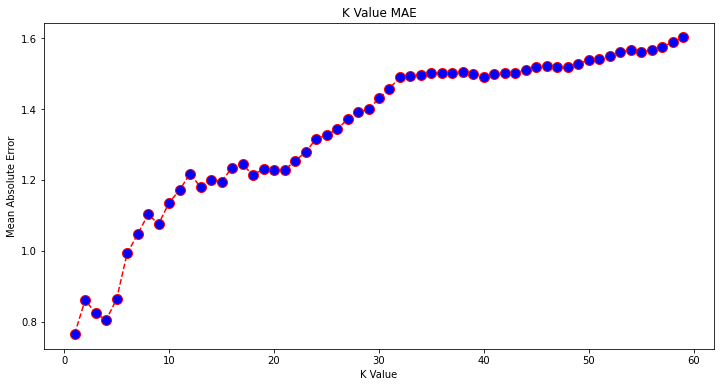

In [538]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

üëâ O valor do K que apresenta o menor erro absoluto poss√≠vel √© o K=1, por√©m escolhi o K=5

üëâ J√° que valores de K muito pequenos podem ser respons√°veis de underfitting e valores de K muito alto overfitting

* #### Criando o modelo KNN com o melhor K

In [539]:
from sklearn.neighbors import KNeighborsRegressor

modeloKNN = KNeighborsRegressor(n_neighbors=5)

In [540]:
modeloKNN.fit(X_train,y_train)

KNeighborsRegressor()

* #### Prevendo os dados

In [541]:
y_pred = modeloKNN.predict(X_test)

* #### M√©tricas

In [542]:
print('======================================= M√©tricas =========================================================')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
print('R¬≤ Score: ', r2_score(y_test, y_pred))

======================================= M√©tricas =========================================================
Mean Absolute Error:  0.8635333333333333
Mean Squared Error:  1.4827854666666664
Root Mean Squared Error:  1.2176967876555584
R¬≤ Score:  0.9152299792702325


* #### Comparando y_previsto x y_teste

============================================= y_test x y_pred ============================================


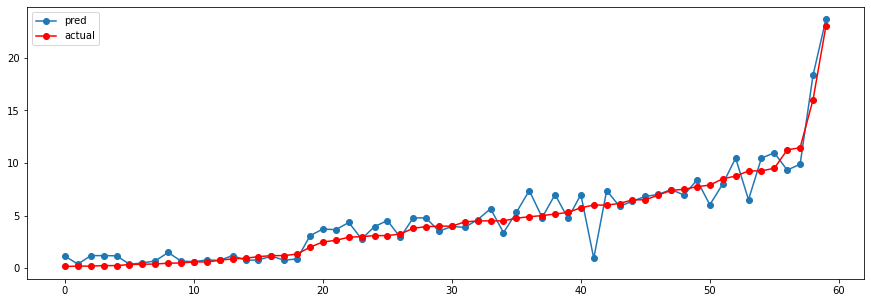

In [543]:
    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

üëâ O modelo KNN com n=5 possui um R¬≤ de 0.92 

## 7.6) RandomForest Regressor

üëâ Random Forest √© um algoritmo de aprendizado de m√°quina que utiliza um conjunto de v√°rias √°rvores de decis√£o para realizar a regress√£o dos dados. 

üëâ Cada √°rvore na floresta √© constru√≠da a partir de uma amostra aleat√≥ria do conjunto de dados de treino e uma sele√ß√£o aleat√≥ria de features para cada n√≥ de divis√£o. 

üëâ O resultado final √© a m√©dia das previs√µes de todas as √°rvores na floresta, o que pode levar a um modelo mais preciso e menos sens√≠vel a overfitting do que uma √∫nica √°rvore de decis√£o.

In [436]:
from sklearn.ensemble import RandomForestRegressor

* #### Criando a fun√ß√£o Forest

In [437]:
def modelo_forest(df_novo,regressor):
    
    
#1) Criando os dados X e y

    X = pd.DataFrame(df_novo, columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
                                'Car_Age', 'Present_Price'])

    y = df_novo['Selling_Price'].values.reshape(-1, 1)
    
#2) Separando em treino e teste

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
#3) Imprimindo o shape

    print('========================================== Tamanho dos dados ===========================================')
    print("x_train", X_train.shape)
    print("x_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)
    

#4) Treinando o modelo
    regressor.fit(X_train, y_train)
    
#5) Prevendo os dados

    y_pred = regressor.predict(X_test)
    
#6) M√©tricas

    print('======================================= M√©tricas =========================================================')
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))
    print('R¬≤ Score: ', r2_score(y_test, y_pred))
    
#7) Plot 

    print('============================================= y_test x y_pred ============================================')
    
    preds = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test':y_test.flatten()})
    preds = preds.sort_values(by='y_test')
    preds = preds.reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(preds['y_pred'], label='pred', marker='o')
    plt.plot(preds['y_test'], label='actual', marker='o', c = 'r')
    plt.legend()
    plt.show()

* #### Criando o modelo de RandomForestRegressor v1

In [438]:
rf_v1 = RandomForestRegressor()

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  0.5164366666666669
Mean Squared Error:  0.6614225740000008
Root Mean Squared Error:  0.8132789029601105
R¬≤ Score:  0.9621868391823666
============================================= y_test x y_pred ============================================


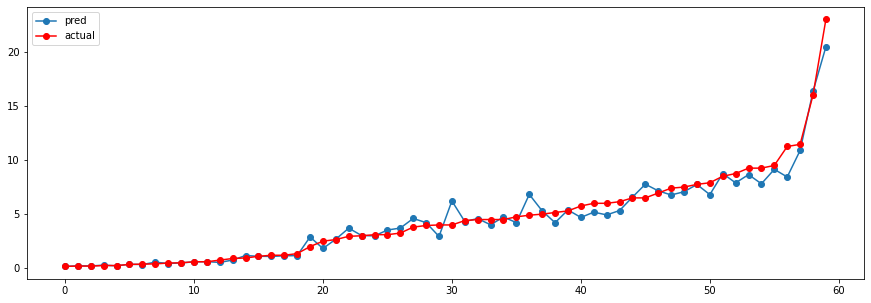

In [439]:
modelo_forest(df,rf_v1)

üëâ O modelo de RandomForest com os hiperpar√¢metros setados no default apresentaram um R¬≤ de 0.96 (assim como dado pelo LazyRegressor).

üëâ Por√©m √© necess√°rio conferir outros hiperpar√¢metros e realizar um cross validation para conferir se n√£o houve overfitting dos dados.

* #### RandomizedSearch

In [443]:
from sklearn.model_selection import RandomizedSearchCV

* #### Par√¢metros escolhidos

In [444]:
param_dist = {"max_depth": [1, 3, 12, None],
              "max_features": [1, 8, 10, 22],
              "n_estimators": [50,100,250]
             }

In [445]:
rsearch = RandomizedSearchCV(rf_v1, 
                             param_distributions = param_dist, 
                             n_iter = 6, #poucas itera√ß√µes se n√£o fica pesado
                             return_train_score = True
                            )  

* #### Treinando o modelo de obtendo os melhores par√¢metros

In [446]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=6,
                   param_distributions={'max_depth': [1, 3, 12, None],
                                        'max_features': [1, 8, 10, 22],
                                        'n_estimators': [50, 100, 250]},
                   return_train_score=True)

In [447]:
bestrg = rsearch.best_estimator_
print (bestrg)

RandomForestRegressor(max_depth=3, max_features=1, n_estimators=50)


* #### Criando o modelo com os novos par√¢meros

In [472]:
rf_v2 = RandomForestRegressor(max_depth=3, max_features=1, n_estimators=50)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  1.6802919196767454
Mean Squared Error:  4.686701162583114
Root Mean Squared Error:  2.1648790180014945
R¬≤ Score:  0.7320639002488227
============================================= y_test x y_pred ============================================


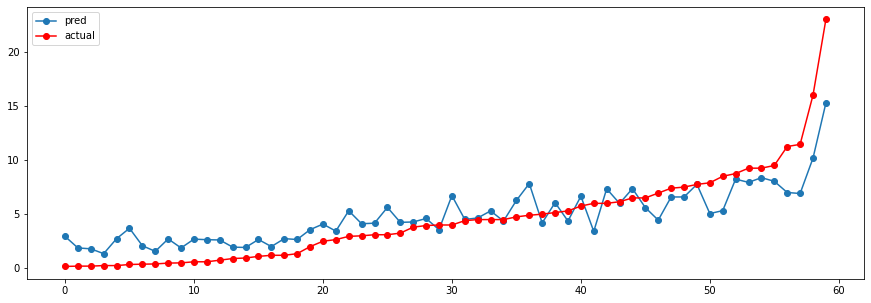

In [473]:
modelo_forest(df,rf_v2)

üëâ Os hiperpar√¢metros encontrados pelo RandomizedSearch n√£o foram ideais. Talvez testar mais par√¢metros possa trazer m√©tricas com bons resultados, por√©m consome muito tempo de itera√ß√£o

* #### GridSearch

In [454]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [1, 3, 12, None],
              "max_features": [1, 8, 10, 22],
              "n_estimators": [50,100,250]
             }

In [455]:
grid_search = GridSearchCV(rf_v1, param_grid = param_grid, return_train_score = True)

In [457]:
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 12, None],
                         'max_features': [1, 8, 10, 22],
                         'n_estimators': [50, 100, 250]},
             return_train_score=True)

In [458]:
bestrf_gs = grid_search.best_estimator_
print (bestrf_gs)

RandomForestRegressor(max_features=1, n_estimators=50)


In [467]:
rf_v3 = RandomForestRegressor(max_features=1, n_estimators=50)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  0.8159866666666666
Mean Squared Error:  1.7132276146666656
Root Mean Squared Error:  1.308903210580013
R¬≤ Score:  0.9020557297903761
============================================= y_test x y_pred ============================================


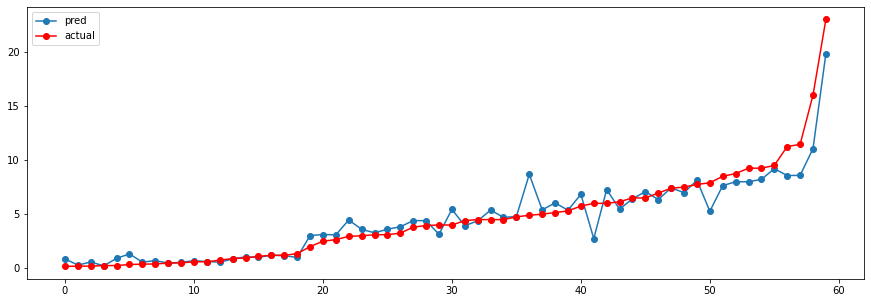

In [476]:
modelo_forest(df,rf_v3)

üëâ Os hiperpar√¢metros do GridSearch foram √∫teis, por√©m o modelo de RandomForest no default teve m√©tricas melhores

üëâ Ent√£o o modelo rf_v1 foi o vencedor

## 7.7) GradientBoostingRegressor 

In [484]:
from sklearn.ensemble import GradientBoostingRegressor

* #### Criando o modelo de GradienteBoosting

In [487]:
est = GradientBoostingRegressor()

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  0.4847975729250516
Mean Squared Error:  0.48230177690990433
Root Mean Squared Error:  0.6944795007125152
R¬≤ Score:  0.972427075564366
============================================= y_test x y_pred ============================================


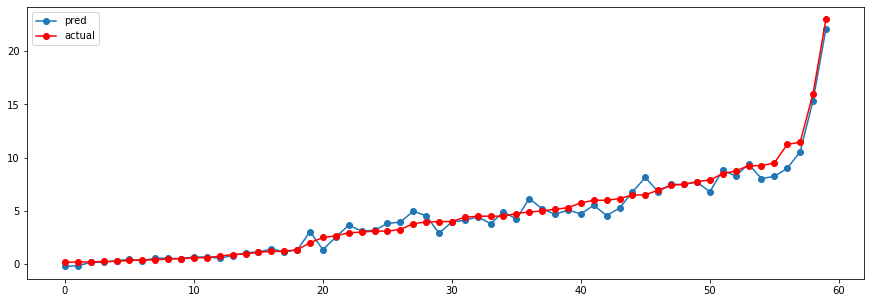

In [488]:
modelo_forest(df,est)

üëâ Mais um modelo que se usado os hiperpar√¢metros padr√µes possui m√©tricas com √≥timas pontua√ß√µes

* #### GridSearch

In [489]:
param_grid = {"learning_rate": [0.01, 0.1, 1],
              "max_depth": [1, 3, 7],
              "n_estimators": [50,250,1200]
             }

In [492]:
grid_search = GridSearchCV(est, param_grid = param_grid, return_train_score = True)

In [493]:
grid_search.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 7],
                         'n_estimators': [50, 250, 1200]},
             return_train_score=True)

In [494]:
bestgb_gs = grid_search.best_estimator_
print (bestgb_gs)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)


In [495]:
est_v2 = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)

========================================== Tamanho dos dados ===========================================
x_train (239, 7)
x_test (60, 7)
y_train (239, 1)
y_test (60, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  0.5541678659550551
Mean Squared Error:  0.7939271041635297
Root Mean Squared Error:  0.8910258717700231
R¬≤ Score:  0.9546116288628312
============================================= y_test x y_pred ============================================


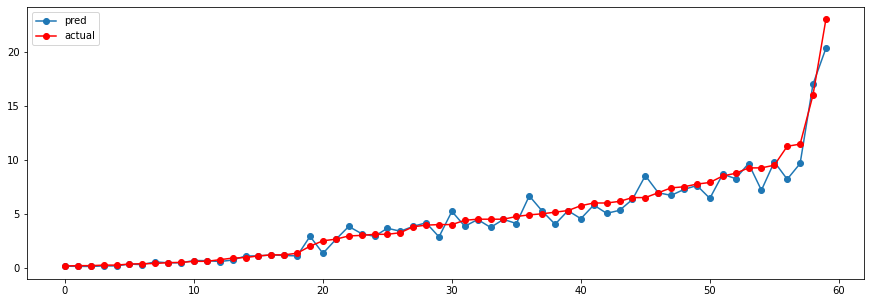

In [496]:
modelo_forest(df,est_v2)

üëâ O modelo obteve algumas m√©tricas ligeiramente menores que o modelo padr√£o

* #### RandomizedSearch

In [497]:
rsearch = RandomizedSearchCV(est, 
                             param_distributions = param_grid, 
                             n_iter = 6, #poucas itera√ß√µes se n√£o fica pesado
                             return_train_score = True
                            )  

In [498]:
rsearch.fit(X,y)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=6,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 3, 7],
                                        'n_estimators': [50, 250, 1200]},
                   return_train_score=True)

In [499]:
bestgb_rs = grid_search.best_estimator_
print (bestgb_rs)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1200)


========================================== Tamanho dos dados ===========================================
x_train (191, 7)
x_test (48, 7)
y_train (191, 1)
y_test (48, 1)
======================================= M√©tricas =========================================================
Mean Absolute Error:  0.8639720750358147
Mean Squared Error:  3.2148402905350917
Root Mean Squared Error:  1.7929975712574437
R¬≤ Score:  0.8821793730420178
============================================= y_test x y_pred ============================================


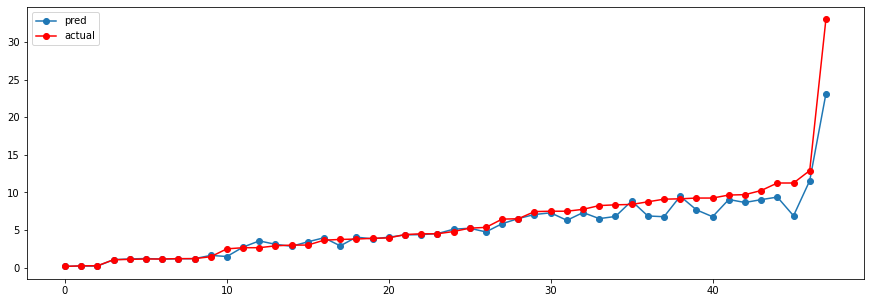

In [501]:
modelo_forest(df_fold_new,est_v2)

üëâ Os par√¢metros encontrados pelo Randomized foram o mesmo do GridSearch

## 8) Conclus√£o üéâ

üëâ Como demonstrado pelo pr√≥prio LazyRegressor, o melhor modelo realmente foi o GradientBoosting com os hiperpar√¢metros.

* #### Prevendo o pre√ßo do carro a partir das outras features

In [506]:
Present_Price = 10.52
Kms_Driven = 38000
Fuel_Type = 1 
Seller_Type = 1
Transmission = 2 #manual
Owner = 1
Car_Age = 4

In [507]:
Model_input = pd.DataFrame({ "Kms_Driven":[Kms_Driven],
                             "Fuel_Type":[Fuel_Type],
                             "Seller_Type":[Seller_Type],
                             "Transmission":[Transmission],
                             "Owner":[Owner],
                             "Car_Age":[Car_Age],
                             "Present_Price":[Present_Price]
                           }
                          )

Model_input.head()

Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  Car_Age  \
0       38000          1            1             2      1        4   

   Present_Price  
0          10.52

### 8.1) Modelo GradientBoostingRegressor

In [510]:
Y_pred = est.predict(Model_input)
print('O pre√ßo seria de:', Y_pred)

O pre√ßo seria de: [7.32139473]


### 8.2) KNNRegressor

In [544]:
#Instanciando o StandardScaler
scaler = StandardScaler()

#Padronizando os dados de treino da vari√°vel X
scaler.fit(Model_input)

#Transformando X e y
Model_input = scaler.transform(Model_input)

In [545]:
Y_pred = modelo_KNN.predict(Model_input)
print('O pre√ßo seria de:', Y_pred)

O pre√ßo seria de: [[4.97711864]]


### 8.3) RandomForestRegressor

In [513]:
Y_pred = rf_v1.predict(Model_input)
print('O pre√ßo seria de:', Y_pred)

O pre√ßo seria de: [7.299]


### 8.4) LinearRegression (Ridge - Alpha = 10)

In [514]:
Y_pred = modelo_ridge_max.predict(Model_input)
print('O pre√ßo seria de:', Y_pred)

O pre√ßo seria de: [[7.04955696]]
